In [151]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.special import factorial, gammaincc, gamma
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from scipy.special import gamma, gammainc
import h5py
from scipy.optimize import curve_fit
import os
import sys

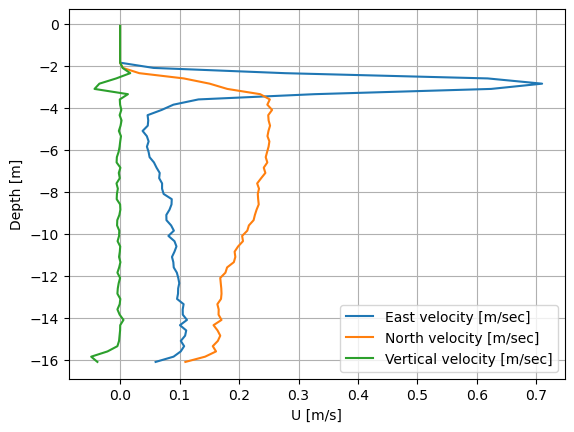

In [152]:
hf = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Archiv\ADCP_2022011904.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec'][()]
hf.close()

time_start = 0*60 # sec
time_stop = 3*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

In [153]:
directory = r'C:\\Users\josep\Desktop\PHYC40900_Project TP\Archiv'

In [154]:
# Define time parameters
time_start = 0 * 60  # sec
time_stop = 15 * 60  # sec
time_step = 1  # sec
start_i = int(time_start / time_step)
stop_i = int(time_stop / time_step)

In [155]:
# Function to process each file
def process_file(file_path):
    with h5py.File(file_path, 'r') as hf:
        east_vel = np.array(hf['East_vel'])
        north_vel = np.array(hf['North_vel'])
        vertical_vel = np.array(hf['Vertical_vel'])

        east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
        north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
        vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

        z = np.array(hf['z_vec'])
        t = hf['time_vec'][()]
        
        return east_vel_mean, north_vel_mean, vertical_vel_mean, z

In [156]:
list_east_vel_mean = []
list_north_vel_mean = []
list_vertical_vel_mean = []
list_z = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.startswith("ADCP_"):
        file_path = os.path.join(directory, filename)
        east_vel_mean, north_vel_mean, vertical_vel_mean, z = process_file(file_path)

        list_east_vel_mean.append(east_vel_mean)
        list_north_vel_mean.append(north_vel_mean)
        list_vertical_vel_mean.append(vertical_vel_mean)
        list_z.append(z.flatten())

In [157]:
len(list_east_vel_mean)

36

# 1) Plot all of different days for north and east velocities

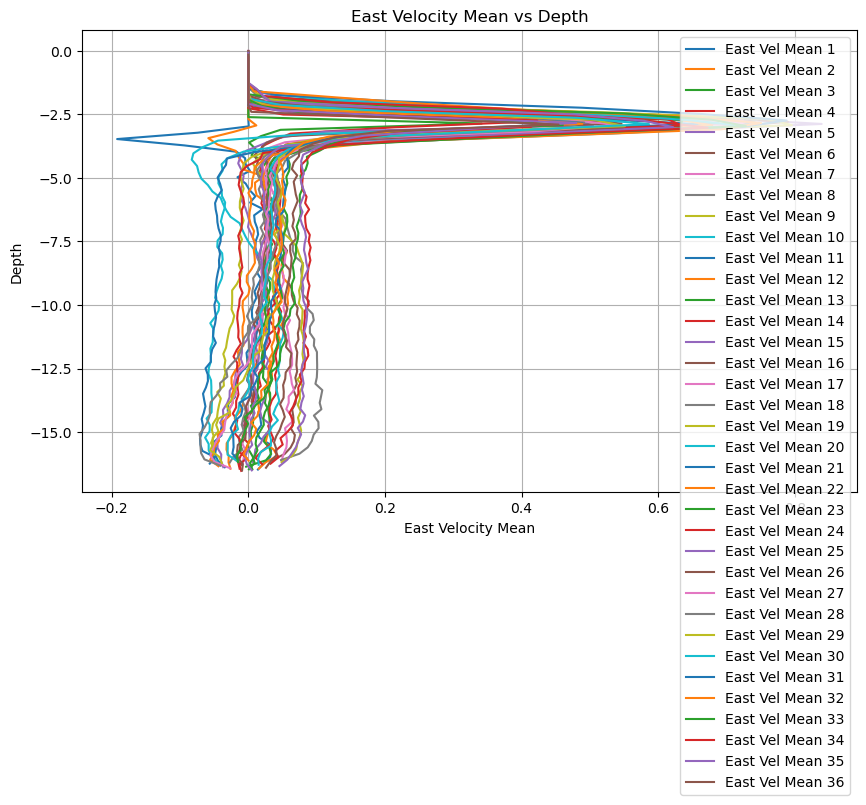

In [111]:
plt.figure(figsize=(10, 6))

# Plotting east velocity mean
for i, east_vel_mean in enumerate(list_east_vel_mean):
    plt.plot(east_vel_mean, list_z[i], label=f'East Vel Mean {i+1}')

plt.xlabel('East Velocity Mean')
plt.ylabel('Depth')
plt.title('East Velocity Mean vs Depth')
plt.legend()
plt.grid(True)
plt.show()


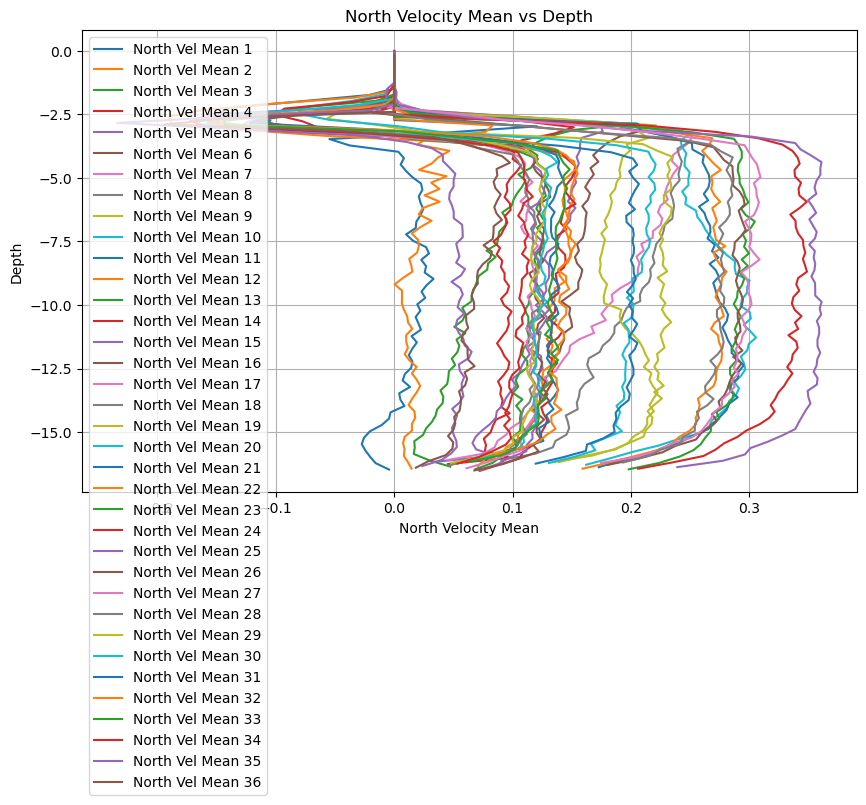

In [159]:
plt.figure(figsize=(10, 6))

# Plotting east velocity mean
for i, north_vel_mean in enumerate(list_north_vel_mean):
    plt.plot(north_vel_mean, list_z[i], label=f'North Vel Mean {i+1}')

plt.xlabel('North Velocity Mean')
plt.ylabel('Depth')
plt.title('North Velocity Mean vs Depth')
plt.legend()
plt.grid(True)
plt.show()

# 2) Maximum average north velocities 

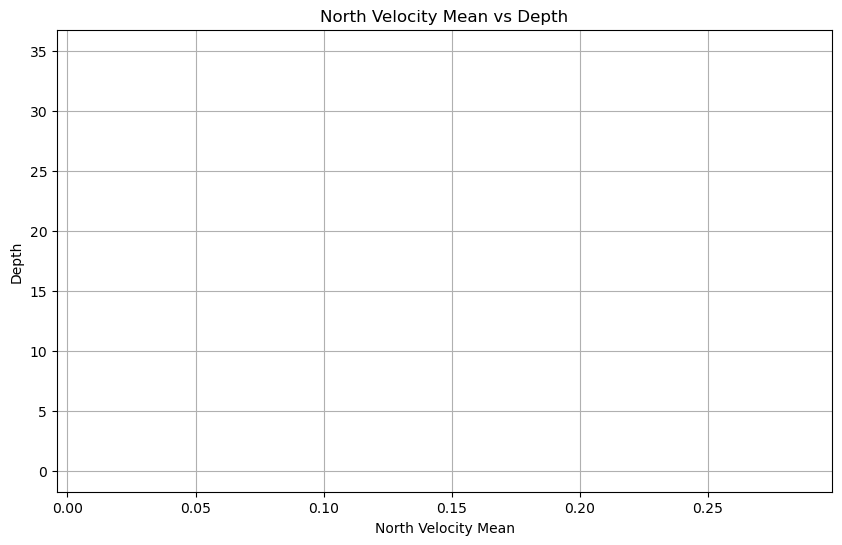

In [161]:
plt.figure(figsize=(10, 6))

# Plotting east velocity mean
for i, north_vel_mean in enumerate(list_north_vel_mean):
    plt.plot(np.mean(north_vel_mean), i)

plt.xlabel('North Velocity Mean')
plt.ylabel('Depth')
plt.title('North Velocity Mean vs Depth')
plt.grid(True)
plt.show()

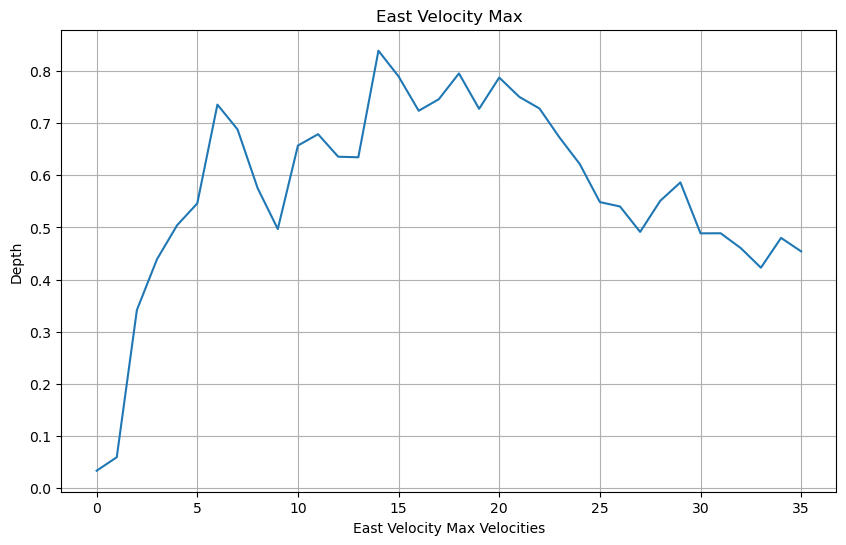

In [182]:
plt.figure(figsize=(10, 6))

max_east = []

for i in range(len(list_east_vel_mean)):
    max_east.append(np.max(list_east_vel_mean[i]))

ind = np.arange(0, len(list_east_vel_mean), 1)

plt.plot(ind, max_east)

plt.xlabel('East Velocity Max Velocities')
plt.ylabel('Depth')
plt.title('East Velocity Max')
plt.grid(True)
plt.show()

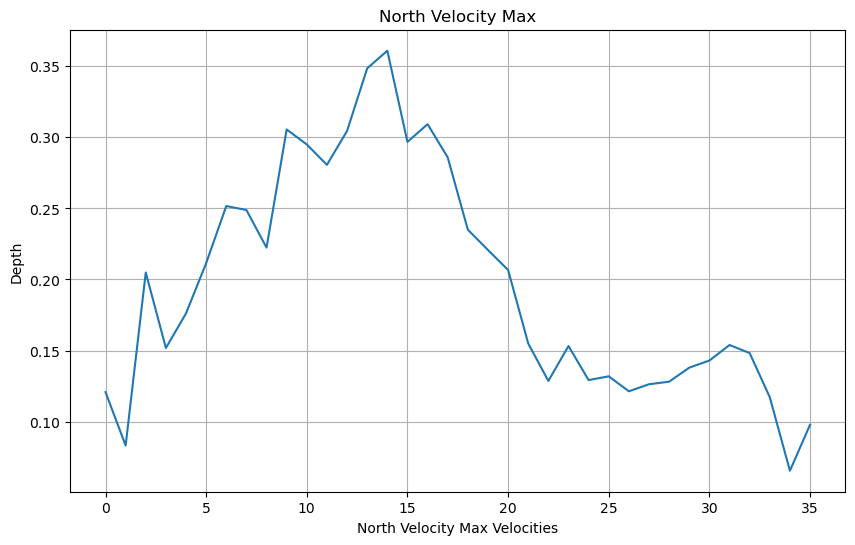

In [179]:
plt.figure(figsize=(10, 6))

max_north = []

for i in range(len(list_north_vel_mean)):
    max_north.append(np.max(list_north_vel_mean[i]))

ind = np.arange(0, len(list_north_vel_mean), 1)

plt.plot(ind, max_north)

plt.xlabel('North Velocity Max Velocities')
plt.ylabel('Depth')
plt.title('North Velocity Max')
plt.grid(True)
plt.show()

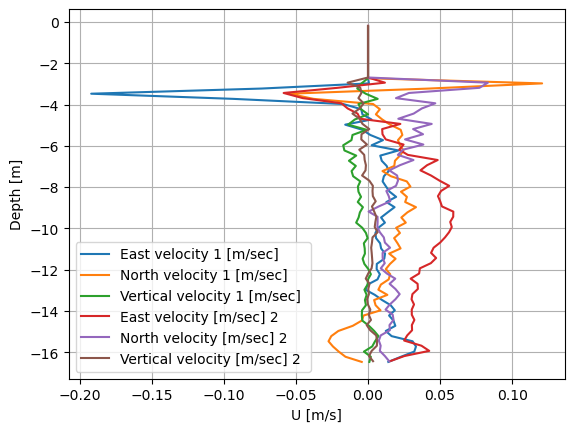

In [98]:
hf1 = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Archiv\ADCP_2022011821.mat', 'r')
east_vel1 = np.array(hf1['East_vel'])
north_vel1 = np.array(hf1['North_vel'])
vertical_vel1 = np.array(hf1['Vertical_vel'])
z1 = np.array(hf1['z_vec'])
t1 = hf1['time_vec'][()]
hf.close()

hf2 = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Archiv\ADCP_2022011822.mat', 'r')
east_vel2 = np.array(hf2['East_vel'])
north_vel2 = np.array(hf2['North_vel'])
vertical_vel2 = np.array(hf2['Vertical_vel'])
z2 = np.array(hf2['z_vec'])
t2 = hf2['time_vec'][()]
hf.close()

time_start = 0*60 # sec
time_stop = 15*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean1 = np.mean(east_vel1[start_i:stop_i], axis=0)
north_vel_mean1 = np.mean(north_vel1[start_i:stop_i], axis=0)
vertical_vel_mean1 = np.mean(vertical_vel1[start_i:stop_i], axis=0)

east_vel_mean2 = np.mean(east_vel2[start_i:stop_i], axis=0)
north_vel_mean2 = np.mean(north_vel2[start_i:stop_i], axis=0)
vertical_vel_mean2 = np.mean(vertical_vel2[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean1, z1, label='East velocity 1 [m/sec]')
ax.plot(north_vel_mean1, z1, label='North velocity 1 [m/sec]')
ax.plot(vertical_vel_mean1, z1, label='Vertical velocity 1 [m/sec]')

ax.plot(east_vel_mean2, z2, label='East velocity [m/sec] 2 ')
ax.plot(north_vel_mean2, z2, label='North velocity [m/sec] 2 ')
ax.plot(vertical_vel_mean2, z2, label='Vertical velocity [m/sec] 2 ')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

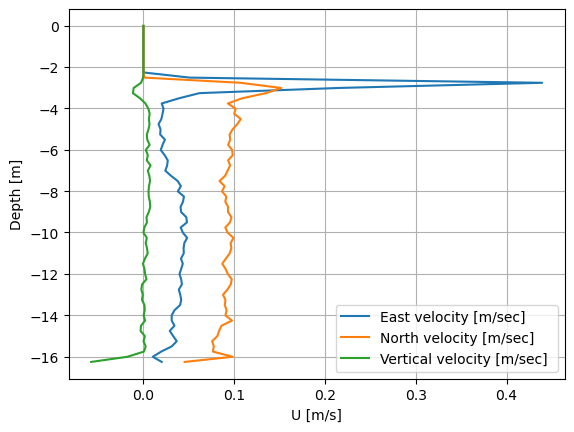

In [185]:
hf2 = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Archiv\ADCP_2022011900.mat', 'r')
east_vel2 = np.array(hf2['East_vel'])
north_vel2 = np.array(hf2['North_vel'])
vertical_vel2 = np.array(hf2['Vertical_vel'])
z2 = np.array(hf2['z_vec'])
t2 = hf2['time_vec'][()]
hf.close()

east_vel_mean2 = np.mean(east_vel2[start_i:stop_i], axis=0)
north_vel_mean2 = np.mean(north_vel2[start_i:stop_i], axis=0)
vertical_vel_mean2 = np.mean(vertical_vel2[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean2, z2, label='East velocity [m/sec] ')
ax.plot(north_vel_mean2, z2, label='North velocity [m/sec] ')
ax.plot(vertical_vel_mean2, z2, label='Vertical velocity [m/sec] ')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.grid(True)
plt.legend()
plt.show()

In [187]:
import pandas as pd

In [200]:
pattern = r'\s+'

In [201]:
df1 = pd.read_csv("C:\\Users\josep\Desktop\PHYC40900_Project TP\ADCP_2022 Information.txt", sep= pattern)

In [202]:
df1.head()

,year,mo,d,h,m,s,Hm0,Hmax,Tpeak,Tz,Tm02,Dmean,Dpeak,Udir,Ucp
0,2022,1,18,21,1,4,0.69,1.39,3.64,3.21,4.55,248.19,244.09,45.25,0.013
1,2022,1,18,21,3,12,0.71,1.16,3.46,3.25,4.57,246.80,242.12,305.13,0.051
2,2022,1,18,21,5,20,0.73,1.33,3.46,3.18,4.55,245.45,231.98,350.10,0.048
3,2022,1,18,21,7,28,0.62,1.09,3.65,3.01,4.59,255.53,243.05,64.30,0.029
4,2022,1,18,21,9,36,0.68,1.24,3.46,3.19,4.53,250.19,242.97,37.24,0.018


In [204]:
year = list(df1['year'])
mo = list(df1['mo'])
d  = list(df1['d'])
h  = list(df1['h'])
m  = list(df1['m'])
s   =   list(df1['m'])

Hm0  =  list(df1['Hm0'])
Hmax  =  list(df1['Hmax'])
Tpeak = list(df1['Tpeak'])
Tz = list(df1['Tz'])
Tm02  = list(df1['Tm02'])
Dmean  = list(df1['Dmean'])
Dpeak   = list(df1['Dpeak'])
Udir   =  list(df1['Udir'])
Ucp    = list(df1['Ucp'])
